In [1]:
import tensorflow as ts 

2025-05-03 01:58:32.295406: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
obs  = 1000
xx =  np.random.uniform(low =-1,high = 1,size=(obs,1))
zz  =  np.random.uniform(low =-1,high = 1,size=(obs,1))
imputs  = np.column_stack((xx,zz))

noise   =  np.random.uniform(low =-1,high = 1,size=(obs,1))

y =  3*xx-6*xx+8+noise
npz = np.savez('my_tf_file',inputs = imputs,targets= y)

In [23]:
df = np.load('my_tf_file.npz')

In [24]:
df

NpzFile 'my_tf_file.npz' with keys: inputs, targets

In [27]:
in_size = 2
ouy = 1
model = ts.keras.Sequential([
    ts.keras.layers.Dense(ouy,
                          kernel_initializer = ts.random_uniform_initializer(minval=-0.1,maxval=0.1),
                          bias_initializer = ts.random_uniform_initializer(minval=-0.1,maxval=0.1))
])
model.compile(optimizer = 'sgd',loss = 'mean_squared_error')
model.fit(df['inputs'],df['targets'],epochs=200,verbose=2)

Epoch 1/200
32/32 - 0s - 10ms/step - loss: 38.7405
Epoch 2/200
32/32 - 0s - 2ms/step - loss: 11.3012
Epoch 3/200
32/32 - 0s - 2ms/step - loss: 3.6666
Epoch 4/200
32/32 - 0s - 2ms/step - loss: 1.4517
Epoch 5/200
32/32 - 0s - 2ms/step - loss: 0.7718
Epoch 6/200
32/32 - 0s - 2ms/step - loss: 0.5395
Epoch 7/200
32/32 - 0s - 2ms/step - loss: 0.4494
Epoch 8/200
32/32 - 0s - 2ms/step - loss: 0.4059
Epoch 9/200
32/32 - 0s - 2ms/step - loss: 0.3819
Epoch 10/200
32/32 - 0s - 2ms/step - loss: 0.3673
Epoch 11/200
32/32 - 0s - 2ms/step - loss: 0.3579
Epoch 12/200
32/32 - 0s - 2ms/step - loss: 0.3521
Epoch 13/200
32/32 - 0s - 2ms/step - loss: 0.3480
Epoch 14/200
32/32 - 0s - 2ms/step - loss: 0.3458
Epoch 15/200
32/32 - 0s - 2ms/step - loss: 0.3441
Epoch 16/200
32/32 - 0s - 2ms/step - loss: 0.3430
Epoch 17/200
32/32 - 0s - 2ms/step - loss: 0.3423
Epoch 18/200
32/32 - 0s - 2ms/step - loss: 0.3419
Epoch 19/200
32/32 - 0s - 2ms/step - loss: 0.3417
Epoch 20/200
32/32 - 0s - 2ms/step - loss: 0.3415
Epoch 

In [28]:
print(model.layers[0].get_weights()[0])

[[-3.0038018 ]
 [ 0.10188023]]


In [30]:
model.layers[0].get_weights()[0].shape

(2, 1)

In [29]:
model.layers[0].get_weights()[1]

array([7.975799], dtype=float32)

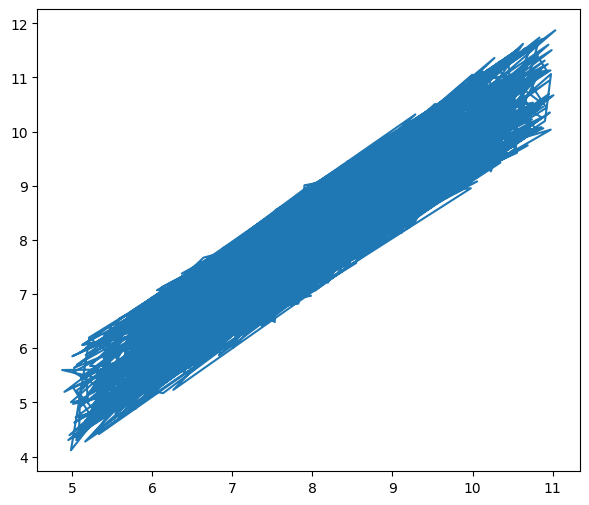

In [42]:
fig ,ax =  plt.subplots(figsize = (7,6))
ax.plot(np.squeeze(model.predict_on_batch(df['inputs'])),np.squeeze(df['targets']))


## numpy neuro network

In [ ]:
xx =  np.random.uniform(low =-1,high = 20,size=(obs,1))
zz  =  np.random.uniform(low =-1,high = 20,size=(obs,1))
imputs  = np.column_stack((xx,zz))

noise   =  np.random.uniform(low =-1,high = 20,size=(obs,1))

y =  3*xx+55*xx+noise




init  = 0.2
weight =  np.random.uniform(-init,init,size=(2,1))
bias =  np.random.uniform(-init,init,size=(1))




rate  = 0.01
for i in range(5000):
    out = np.dot(imputs,weight)+bias
    delta =  out - y
    loss = np.sum(delta**2)/2/obs
    del_scale = delta/obs
    print(loss)
    weight = weight - rate*np.dot(imputs.T,del_scale)